## <i> <span style='color:red'>NEURAL NETWORK-FOREST FIRE DATA</i></span>

### PROBLEM STATMENT: Predicting turbine energy yield (TEY) using ambient variables as features, with the help of Neural network.

In [1]:
#  Importing the libraries
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading dataset
data = pd.read_csv("/content/gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data1=data[['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY']]
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


In [5]:
# Basic informations about the data

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data1[data1.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY


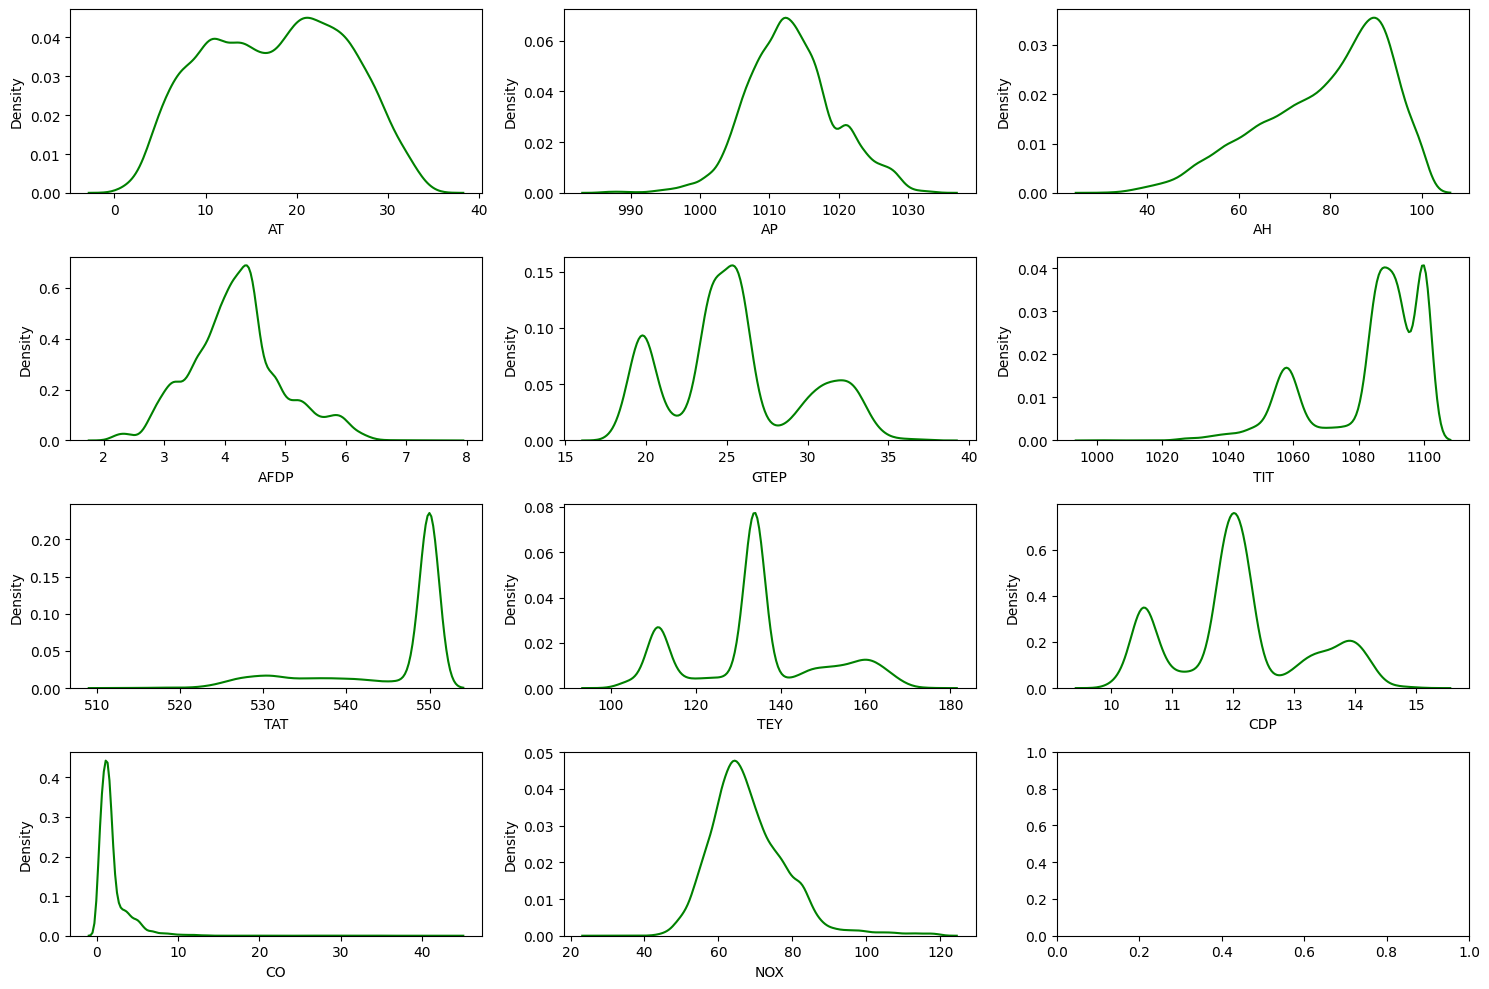

In [7]:
#  Visualization of the dataset
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.kdeplot(data1.AT, ax=ax[0,0],color='g')
sns.kdeplot(data1.AP, ax=ax[0,1],color='g')
sns.kdeplot(data1.AH, ax=ax[0,2],color='g')
sns.kdeplot(data1.AFDP, ax=ax[1,0],color='g')
sns.kdeplot(data1.GTEP, ax=ax[1,1],color='g')
sns.kdeplot(data1.TIT, ax=ax[1,2],color='g')
sns.kdeplot(data1.TAT, ax=ax[2,0],color='g')
sns.kdeplot(data1.TEY, ax=ax[2,1],color='g')
sns.kdeplot(data1.CDP, ax=ax[2,2],color='g')
sns.kdeplot(data1.CO, ax=ax[3,0],color='g')
sns.kdeplot(data1.NOX, ax=ax[3,1],color='g')

plt.tight_layout()
plt.show()

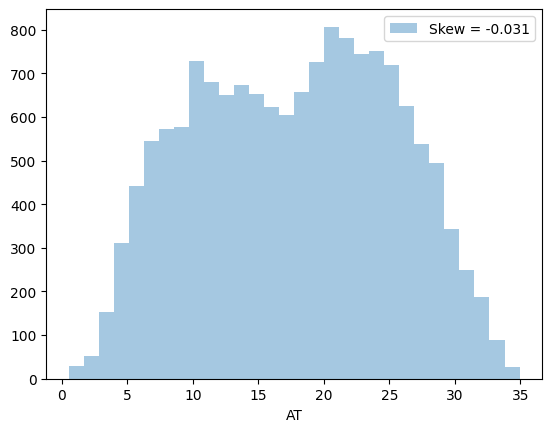

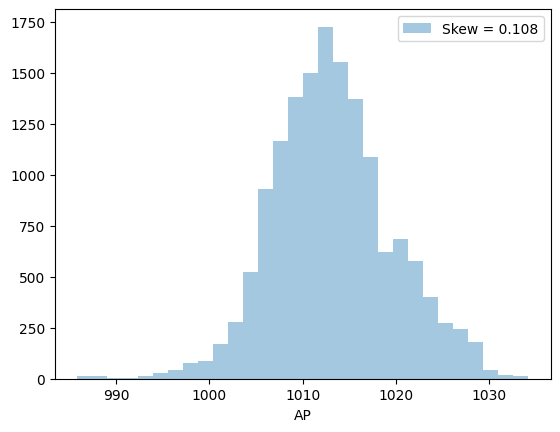

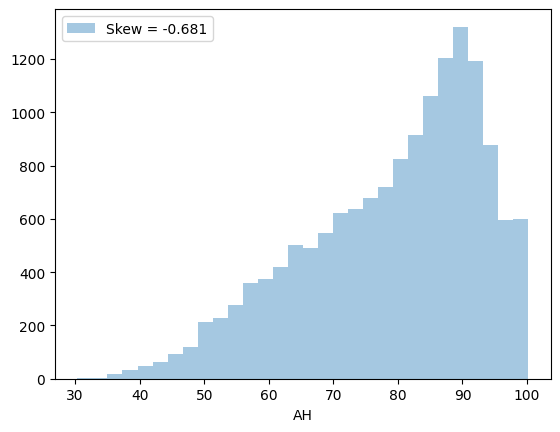

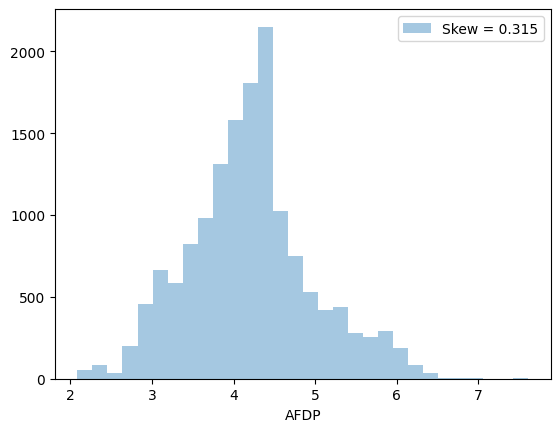

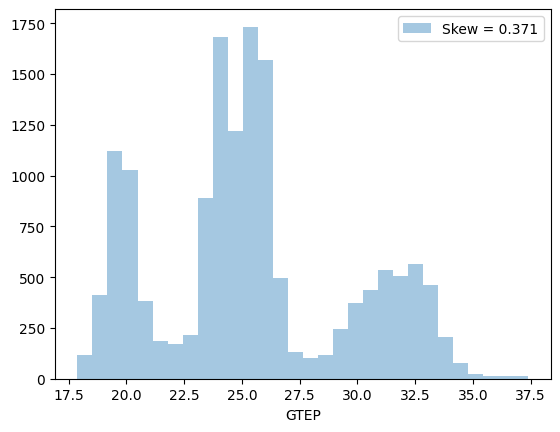

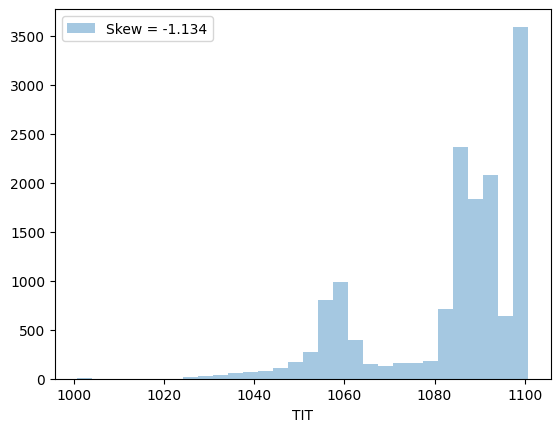

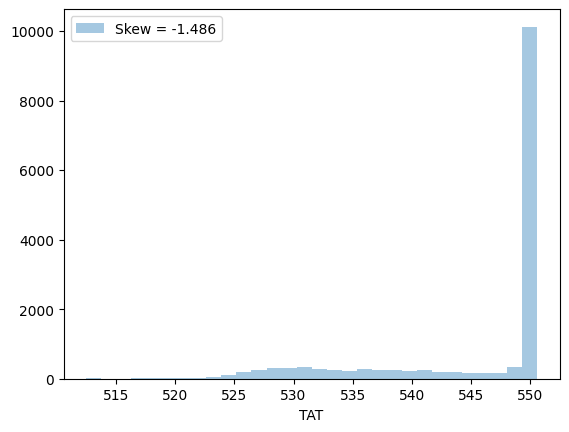

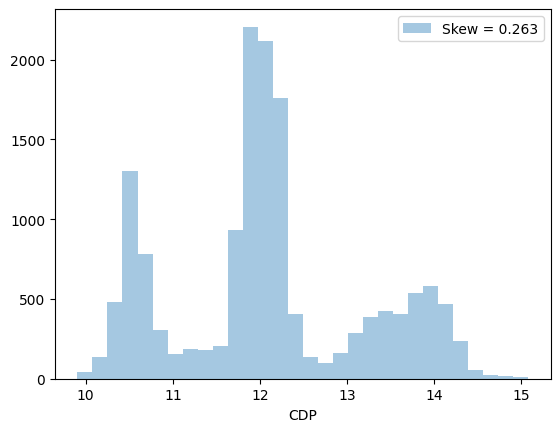

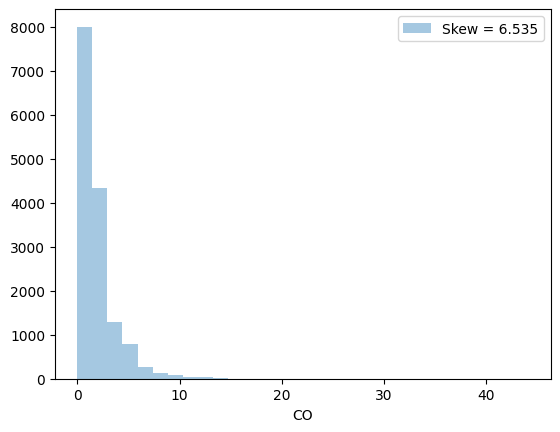

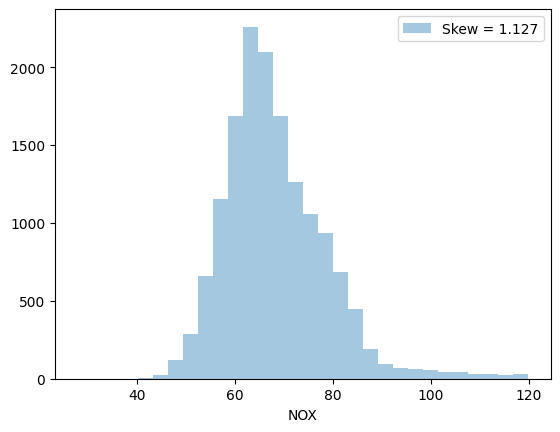

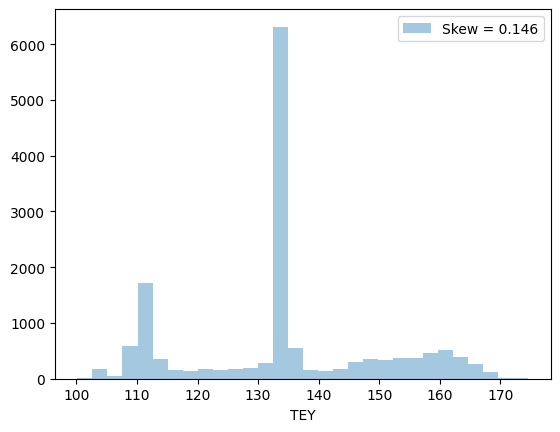

In [11]:
numerical_features = data1.describe(include=["int64","float64"]).columns
numerical_features

numerical_features=[feature for feature in data1.columns if data1[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data1[feat].skew()
    sns.distplot(data1[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [12]:
data1.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


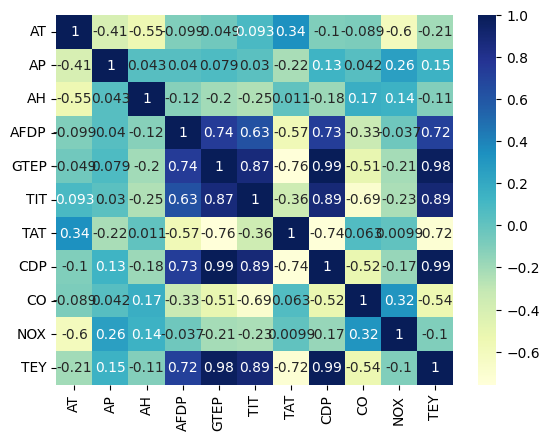

In [15]:
dataplot = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [19]:

from collections import Counter
df=data1.copy()
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 1543 observations with more than 2 outliers


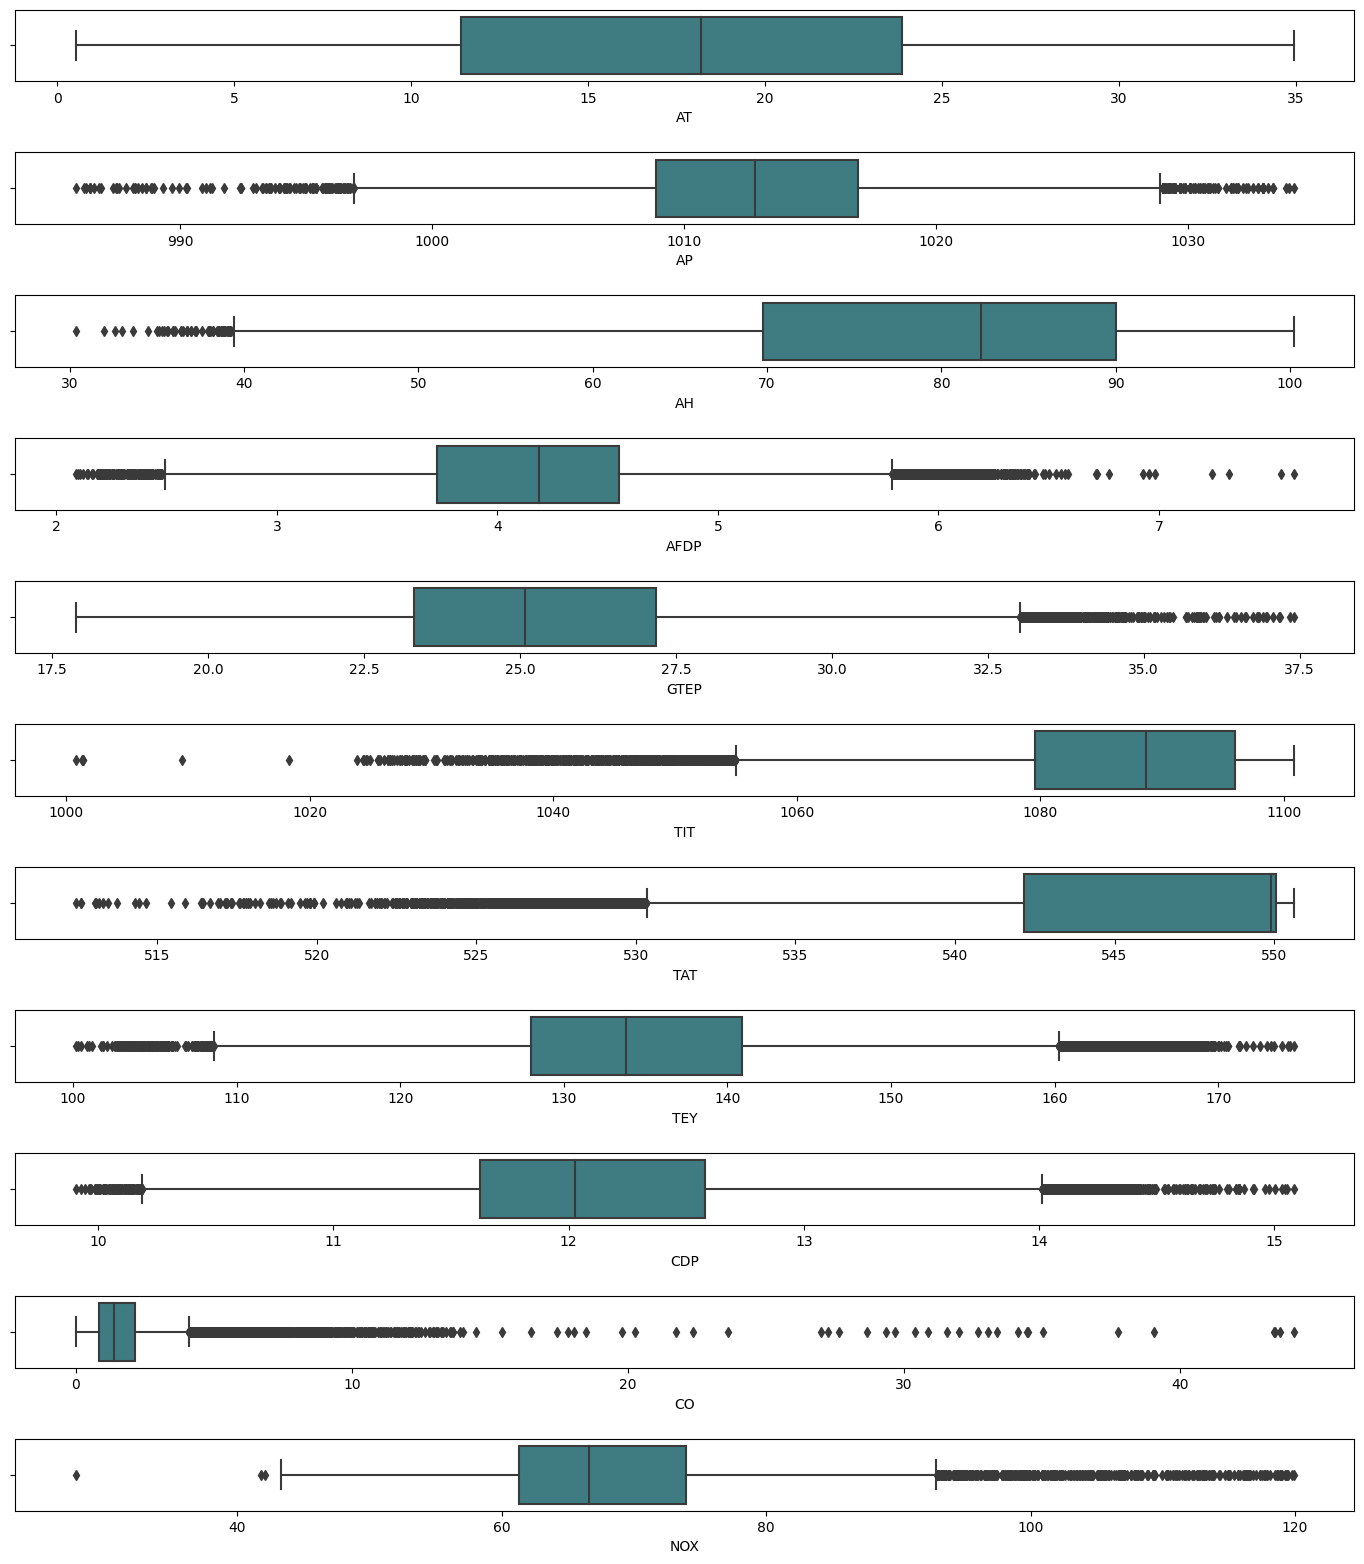

In [20]:
ot=df.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

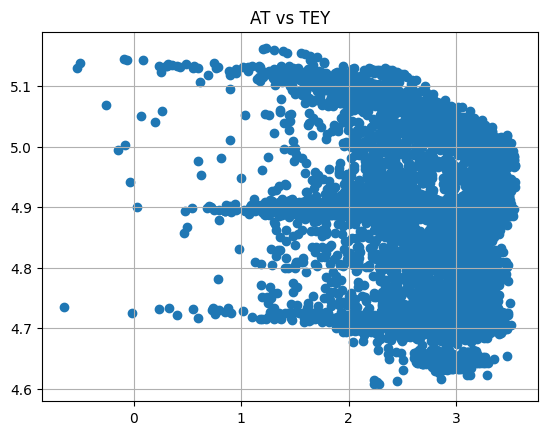

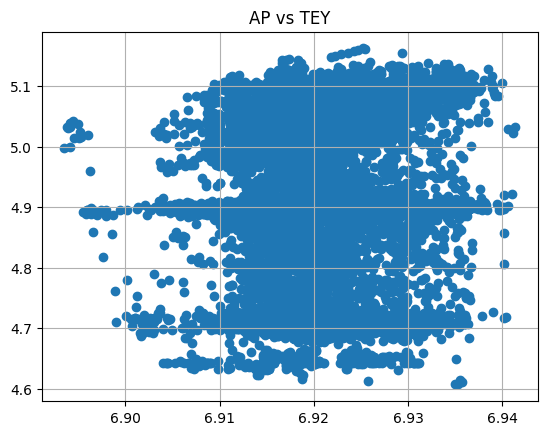

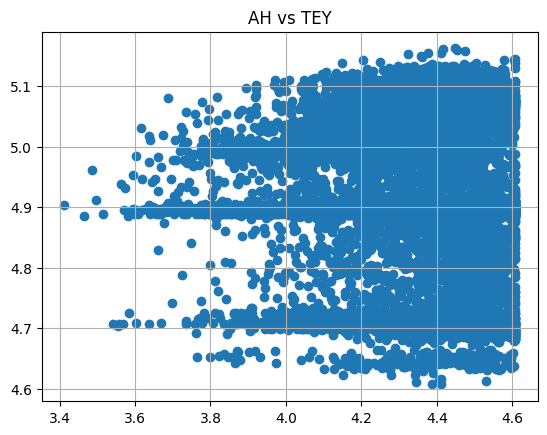

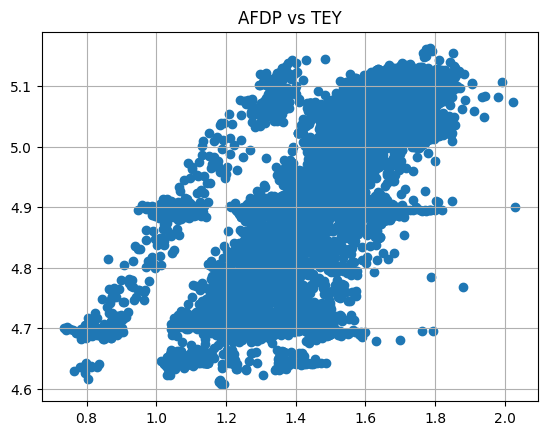

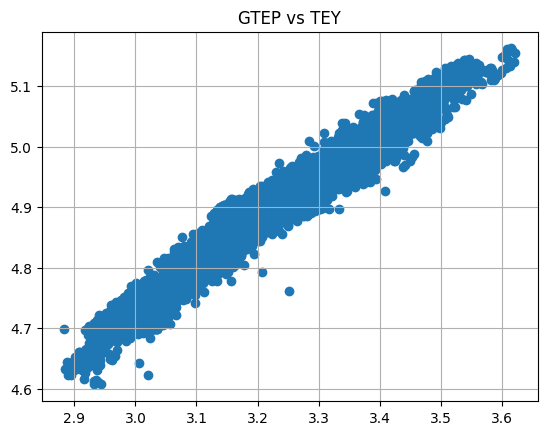

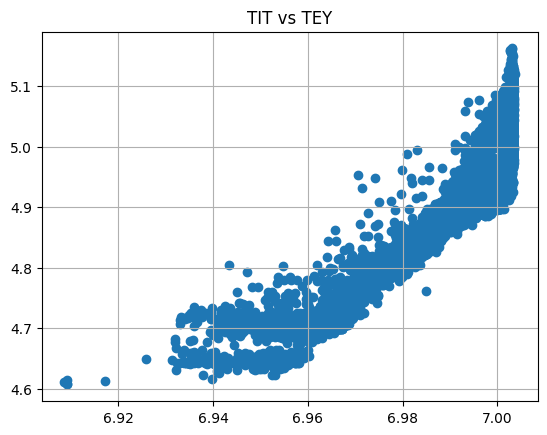

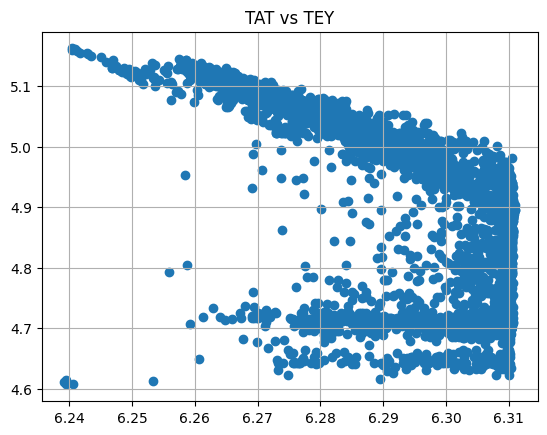

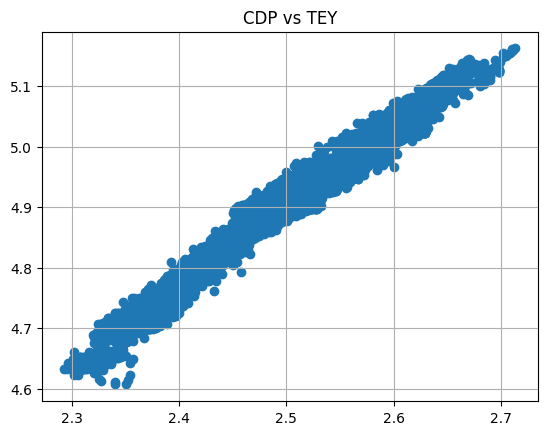

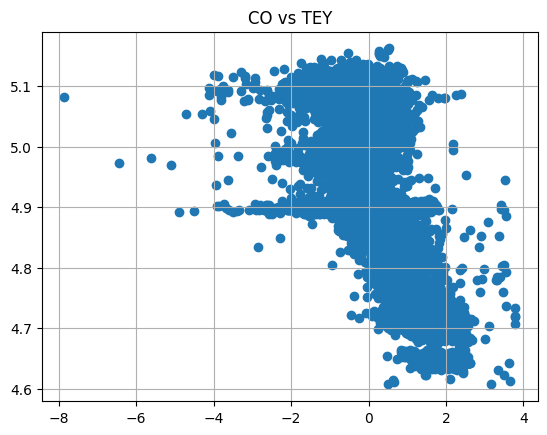

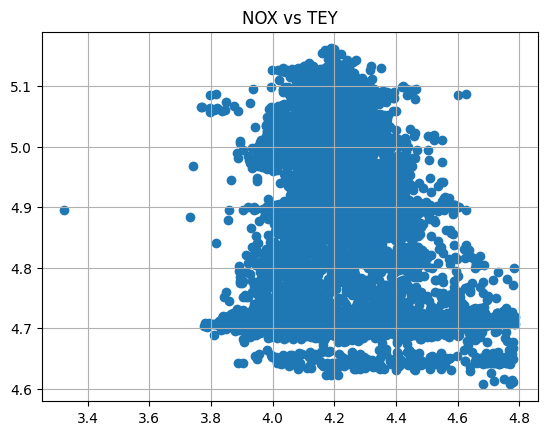

In [21]:
for i in df.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [22]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_data1 = LabelEncoder()
data1=data1.apply(LabelEncoder().fit_transform)
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [24]:
data1['TEY'].describe()

count    15039.00000
mean      1818.09994
std        999.24952
min          0.00000
25%       1344.50000
50%       1739.00000
75%       2191.50000
max       4206.00000
Name: TEY, dtype: float64

In [25]:
data1['TEY_New']=pd.cut(data1.TEY,bins=[0,1739,4206],labels=[0,1])
data2=data1.drop(['TEY'],axis=1)
data2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0


In [26]:
data2.TEY_New.nunique

<bound method IndexOpsMixin.nunique of 0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY_New, Length: 15039, dtype: category
Categories (2, int64): [0 < 1]>

In [27]:
data3 = data2.values
data3

array([[ 1230,   292, 12092, ..., 10695, 10885,     0],
       [ 1199,   297, 12149, ..., 10775, 10892,     0],
       [ 1251,   301, 11882, ..., 10746, 10835,     0],
       ...,
       [ 1433,   276, 12533, ..., 12818, 11571,     0],
       [ 1302,   281, 12449, ..., 12579, 11636,     0],
       [ 1266,   285, 12227, ..., 12087, 11620,     0]])

In [28]:
X = data3[:,0:10]
y = data3[:,10]


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33)

### Constructing a Sequential neural network with
### input neurons:32neurons  
###  hidden layer :10 neurons
### output layer:1neuron


In [30]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Model Fitting

In [32]:
hist = model.fit(X, y,validation_split=0.33,epochs=150, batch_size=10)


Epoch 1/150
1008/1008 [==============================] - 4s 3ms/step - loss: 0.3646 - acc: 0.7969 - val_loss: -8255732986150912.0000 - val_acc: 0.8449
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3169 - acc: 0.8318 - val_loss: -6811922821283840.0000 - val_acc: 0.8906
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3010 - acc: 0.8427 - val_loss: -10510012606578688.0000 - val_acc: 0.8825
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2971 - acc: 0.8457 - val_loss: -13126971613511680.0000 - val_acc: 0.8862
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2956 - acc: 0.8450 - val_loss: -8943613874536448.0000 - val_acc: 0.8481
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2920 - acc: 0.8462 - val_loss: -11232724605992960.0000 - val_acc: 0.8835
Epoch 7/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2806 - acc: 

###  Model Evaluation

In [33]:
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -12310981514362880.0000 - acc: 0.8967
acc: 89.67%


In [34]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

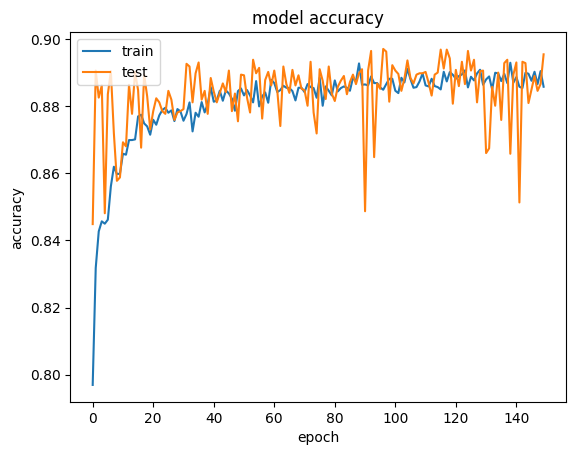

In [35]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

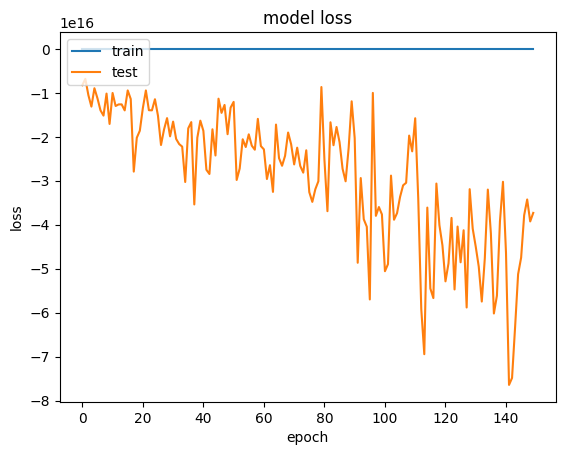

In [36]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Inference:

### The neural network helps predicting the turbine energy yield (TEY) using ambient variables as features, with the accuracy score 89.67% with loss -23889898738024448.0000
